# Ion kinetic energy calculation
## uses pb-208 isotope which has Z=82 protons and N=126 neutrons (A=208)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from matplotlib.patches import *
import pandas as pd

Matplotlib is building the font cache; this may take a moment.


In [2]:
def my_mpl_style():
    '''Sets my preferred style options for matplotlib.'''
    import matplotlib as mpl
    # Font sizes
    mpl.rcParams['axes.labelsize'] = 18
    mpl.rcParams['legend.fontsize'] = 18
    mpl.rcParams['xtick.labelsize'] = 16
    mpl.rcParams['ytick.labelsize'] = 16
    mpl.rcParams['axes.formatter.limits'] = (-2, 3)
my_mpl_style()

In [11]:
E_cin_per_nucleon = 0.65 # GeV/u

# Ion properties
A = 208.0 # protons + neutrons
Z = 82.0 # protons
N = 126.0 # neutrons
charge = 54.0
m_proton_GeV = 0.93828 # GeV
m_neutron_GeV = 0.93957 # GeV
m_electron_GeV = 0.000511 # GeV
m_u_GeV = 0.9315 # GeV
mass_defect_GeV = Z*m_proton_GeV + N*m_neutron_GeV + (Z-charge)*m_electron_GeV - A*m_u_GeV
E_0 = Z*m_proton_GeV + N*m_neutron_GeV - mass_defect_GeV


p = E_0*np.sqrt( (((E_cin_per_nucleon*A)/E_0)+1 )**2 - 1)

rho = 70.0789 # m
Brho = p/charge

print(f"Kinetic energy per nucleon = {round(E_cin_per_nucleon,3)} GeV/u")
print(f"E0 or rest mass of ion = {round(E_0,3)} GeV/c^2")
print(f"Ion beam momentum = {round(p,3)} GeV/c")
print(f"Rigidity (Brho) = {round(Brho,3)} GeV (also called equivalent proton momentum)")
print(f"Rigidity (Brho) = {round(Brho*3.3356,3)} T*m")

E_cin_proton = np.sqrt(Brho**2+m_proton_GeV**2)-m_proton_GeV
print(f"\nA proton beam at this rigidity would have a kinetic energy of {round(E_cin_proton,3)} GeV\n")

B = 3.3356*p/(rho*charge)
print(f"B-field = {round(B,3)} T")

I = B/(2.5e-4) # Only true at low energy when the field is linear, otherwise need to use transfer function
print(f"Current in the PS main dipole units = {round(I,1)} A")

Kinetic energy per nucleon = 0.65 GeV/u
E0 or rest mass of ion = 193.738 GeV/c^2
Ion beam momentum = 265.83 GeV/c
Rigidity (Brho) = 4.923 GeV (also called equivalent proton momentum)
Rigidity (Brho) = 16.42 T*m

A proton beam at this rigidity would have a kinetic energy of 4.073 GeV

B-field = 0.234 T
Current in the PS main dipole units = 937.3 A


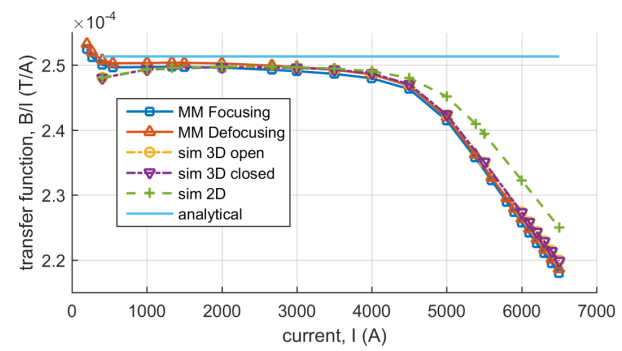

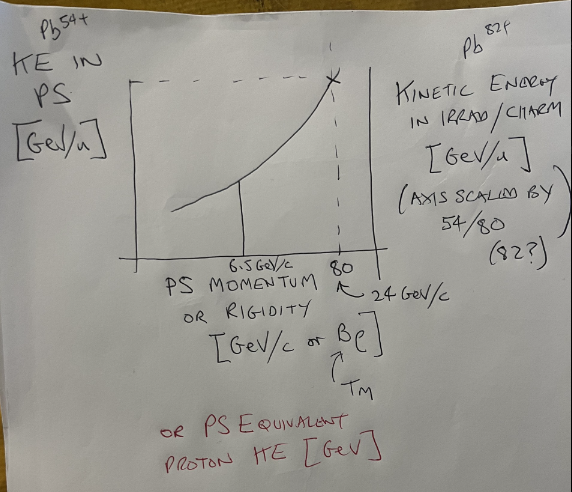

In [4]:
E_cin_per_nucleon_list = np.concatenate([np.linspace(0, 0.1, 100), np.linspace(0, 1, 100), np.linspace(1, 6, 100)])

Brho_list = []

for E_cin_per_nucleon in E_cin_per_nucleon_list:

    # Ion properties
    A = 208 # protons + neutrons
    Z = 82 # protons
    N = 126 # neutrons
    charge = 54
    m_proton_GeV = 0.93828 # GeV
    m_neutron_GeV = 0.93957 # GeV
    m_electron_GeV = 0.000511 # GeV
    m_u_GeV = 0.9315 # GeV
    mass_defect_GeV = Z*m_proton_GeV + N*m_neutron_GeV + (Z-charge)*m_electron_GeV - A*m_u_GeV
    E_0 = Z*m_proton_GeV + N*m_neutron_GeV - mass_defect_GeV


    p = E_0*np.sqrt( (((E_cin_per_nucleon*A)/E_0)+1 )**2 - 1)

    rho = 70.0789 # m
    Brho = p/charge

    Brho_list.append(Brho)
    

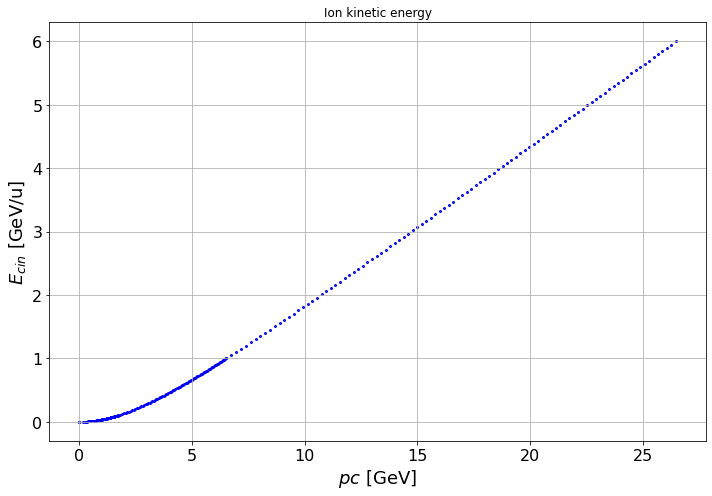

In [5]:
fig, ax = plt.subplots(tight_layout=True, figsize=(10,7))

ax.scatter(Brho_list, E_cin_per_nucleon_list, lw=2, color="b", s=1)
ax.set_xlabel(r"$pc$ [GeV]")
ax.set_ylabel("$E_{cin}$ [GeV/u]")
ax.set_title("Ion kinetic energy")
ax.grid()

# Other way round

In [6]:
Brho_list = np.linspace(0,80, 1000)
E_cin_per_nucleon_list = []
for Brho in Brho_list:
    E_cin_per_nucleon = (E_0/A)*(np.sqrt((charge*Brho/E_0)**2+1)-1)
    E_cin_per_nucleon_list.append(E_cin_per_nucleon)
    
Brho_list_t8 = np.linspace(0,80, 1000)
E_cin_per_nucleon_list_t8 = []
for Brho in Brho_list_t8:
    E_cin_per_nucleon_t8 = (E_0/A)*(np.sqrt((82*Brho/E_0)**2+1)-1)
    E_cin_per_nucleon_list_t8.append(E_cin_per_nucleon_t8)

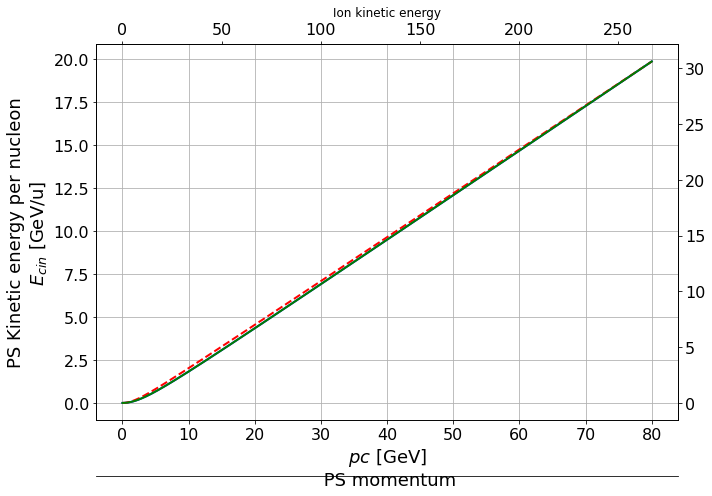

In [7]:
fig, ax = plt.subplots(tight_layout=True, figsize=(10,7))

ax2 = ax.twinx()
ax3 = ax.twiny()
# Add some extra space for the second axis at the bottom
fig.subplots_adjust(bottom=0.5)


ax.plot(Brho_list, E_cin_per_nucleon_list, lw=2, color="b")
ax2.plot(Brho_list_t8, E_cin_per_nucleon_list_t8, lw=2, color="r", ls="--")
ax3.plot(Brho_list*3.3356, E_cin_per_nucleon_list, lw=2, color="g")

ax3.spines["bottom"].set_position(("axes", -0.15))
ax3.set_frame_on(True)
ax3.patch.set_visible(False)

ax.set_xlabel(r"$pc$ [GeV]"+"\n PS momentum")
ax.set_ylabel("PS Kinetic energy per nucleon\n$E_{cin}$ [GeV/u]")
ax.set_title("Ion kinetic energy")
ax.grid()

# Draw everything on one plot

In [8]:
# Data to plot
max_Brho = 27
Brho_list = np.linspace(0,max_Brho, 1000)
E_cin_per_nucleon_list = []
E_cin_per_nucleon_list_t8 = []
for Brho in Brho_list:
    E_cin_per_nucleon = (E_0/A)*(np.sqrt((charge*Brho/E_0)**2+1)-1)
    E_cin_per_nucleon_list.append(E_cin_per_nucleon)

    E_cin_per_nucleon_t8 = (E_0/A)*(np.sqrt((82*Brho/E_0)**2+1)-1)
    E_cin_per_nucleon_list_t8.append(E_cin_per_nucleon_t8)
    
    
Special_Ecin_u = [0.5,1,2]
Special_momentum_from_E_cin = []
for E_cin_per_nucleon in Special_Ecin_u:

    mass_defect_GeV = Z*m_proton_GeV + N*m_neutron_GeV + (Z-charge)*m_electron_GeV - A*m_u_GeV
    E_0 = Z*m_proton_GeV + N*m_neutron_GeV - mass_defect_GeV
    p = E_0*np.sqrt( (((E_cin_per_nucleon*A)/E_0)+1 )**2 - 1)
    rho = 70.0789 # m
    Brho = p/charge
    Special_momentum_from_E_cin.append(Brho)

    
Special_Brho = [2.8, 24, 26.5]
Special_E_cin_from_Brho = []
Special_E_cin_from_Brho_irrad = []
for Brho in Special_Brho:
    E_cin = E_0/208*(np.sqrt((charge*Brho/E_0)**2+1) -1)
    Special_E_cin_from_Brho.append(E_cin)
    E_cin_irrad = E_0/208*(np.sqrt((82*Brho/E_0)**2+1) -1)
    Special_E_cin_from_Brho_irrad.append(E_cin_irrad)
    
# Special_Ecin_u_irrad = [2,3]
# Special_Brho_from_E_cin_irrad = []
# for E_cin_per_nucleon in Special_Ecin_u_irrad:
#     p = E_0*np.sqrt( (((E_cin_per_nucleon*A)/E_0)+1 )**2 - 1)
#     Brho = p/82
#     Special_Brho_from_E_cin_irrad.append(Brho)

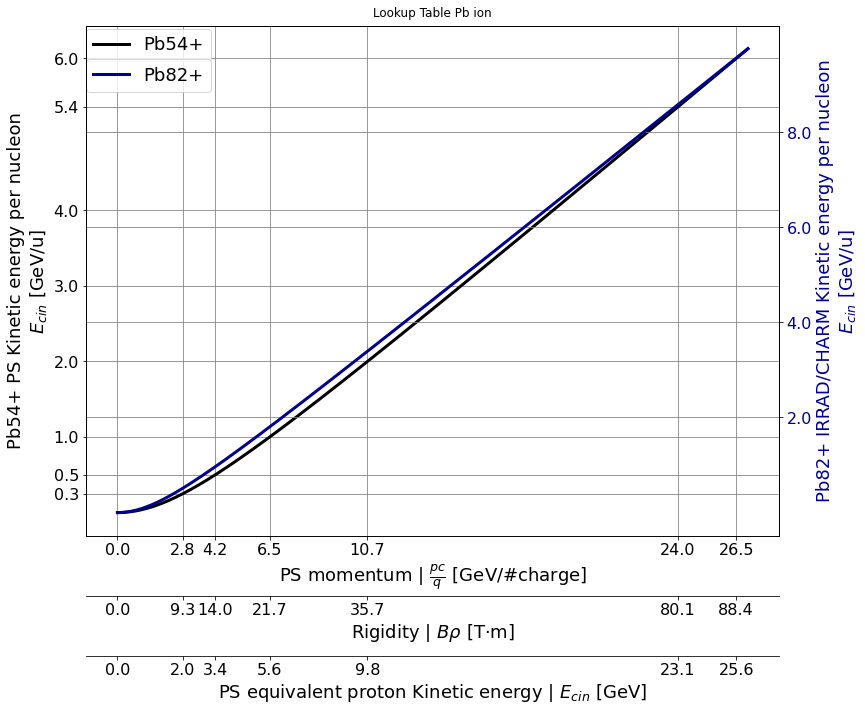

In [9]:
# Plot the data
fig, ax1 = plt.subplots(figsize=(12,10), tight_layout=True)

axt8 = ax1.twinx()

ax1.plot(Brho_list,E_cin_per_nucleon_list, color="k", lw=3, zorder=99, label="Pb54+")
axt8.plot(Brho_list, E_cin_per_nucleon_list_t8, lw=3, color="darkblue", ls="-", label="Pb82+")
ax1.set_xlabel(r"PS momentum | $\frac{pc}{q}$ [GeV/#charge]")
ax1.set_ylabel("Pb54+ PS Kinetic energy per nucleon\n$E_{cin}$ [GeV/u]")
axt8.set_ylabel("Pb82+ IRRAD/CHARM Kinetic energy per nucleon\n$E_{cin}$ [GeV/u]", color="darkblue")

pc_axis = np.sort(np.concatenate([[0],Special_Brho, Special_momentum_from_E_cin]))

ax1.set_xticks(pc_axis)
ax1.set_xticklabels(pc_axis)
labels = [item.get_text() for item in ax1.get_xticklabels()]
ax1.set_xticklabels([str(round(float(label), 1)) for label in labels])

pc_yaxis = np.sort(np.concatenate([[3,4],Special_Ecin_u,Special_E_cin_from_Brho]))
ax1.set_yticks(pc_yaxis)
ax1.set_yticklabels(pc_yaxis)
labels = [item.get_text() for item in ax1.get_yticklabels()]
ax1.set_yticklabels([str(round(float(label), 1)) for label in labels])

# IRRAD vertical axis
pc_yaxis_irrad = np.sort(np.concatenate([[2,4,6,8],]))
axt8.set_yticks(pc_yaxis_irrad)
axt8.set_yticklabels(pc_yaxis_irrad,color="darkblue")
labels = [item.get_text() for item in axt8.get_yticklabels()]
axt8.set_yticklabels([str(round(float(label), 1)) for label in labels])

# Set second x-axis Rigidity in Tm
ax2 = ax1.twiny()

ax2.set_xticks(pc_axis)
ax2.set_xticklabels(pc_axis*3.3356)
# Reduce number of decimal points
labels = [item.get_text() for item in ax2.get_xticklabels()]
ax2.set_xticklabels([str(round(float(label), 1)) for label in labels])

ax2.xaxis.set_ticks_position('bottom') # set the position of the second x-axis to bottom
ax2.xaxis.set_label_position('bottom') # set the position of the second x-axis to bottom
ax2.spines['bottom'].set_position(('outward', 60))
ax2.set_xlabel(r'Rigidity | $B\rho$ [T$\cdot$m]')
ax2.set_xlim(ax1.get_xlim())

# Set third x-axis Proton equivalent kinetic energy
ax3 = ax1.twiny()

ax3.set_xticks(pc_axis)
ax3.set_xticklabels(np.sqrt(pc_axis**2+m_proton_GeV**2)-m_proton_GeV)
# Reduce number of decimal points
labels = [item.get_text() for item in ax3.get_xticklabels()]
ax3.set_xticklabels([str(round(float(label), 1)) for label in labels])

ax3.xaxis.set_ticks_position('bottom')
ax3.xaxis.set_label_position('bottom')
ax3.spines['bottom'].set_position(('outward', 120))
ax3.set_xlabel(r'PS equivalent proton Kinetic energy | $E_{cin}$ [GeV]')
ax3.set_xlim(ax1.get_xlim())

ax1.grid(color="gray", zorder=0)
axt8.grid(color="gray", zorder=0)

ax1.legend(loc=(0,0.93))
axt8.legend(loc=(0,0.87))

fig.suptitle("Lookup Table Pb ion")

plt.savefig("fig/kinetic_energy_lookup_table.png", dpi=300, format=None, metadata=None,
        bbox_inches="tight", transparent = False, facecolor = "white")

## E cin ion vs proton

In [10]:
E_cin_per_nucleon_list = np.linspace(0,20,100)
E_cin_proton_list = []

for E_cin_per_nucleon in E_cin_per_nucleon_list:

    # Ion properties
    A = 208 # protons + neutrons
    Z = 82 # protons
    N = 126 # neutrons
    charge = 54
    m_proton_GeV = 0.93828 # GeV
    m_neutron_GeV = 0.93957 # GeV
    m_electron_GeV = 0.000511 # GeV
    m_u_GeV = 0.9315 # GeV
    mass_defect_GeV = Z*m_proton_GeV + N*m_neutron_GeV + (Z-charge)*m_electron_GeV - A*m_u_GeV
    E_0 = Z*m_proton_GeV + N*m_neutron_GeV - mass_defect_GeV


    p = E_0*np.sqrt( (((E_cin_per_nucleon*A)/E_0)+1 )**2 - 1)

    rho = 70.0789 # m
    Brho = p/charge


    E_cin_proton = np.sqrt(Brho**2+m_proton_GeV**2)-m_proton_GeV
    E_cin_proton_list.append(E_cin_proton)

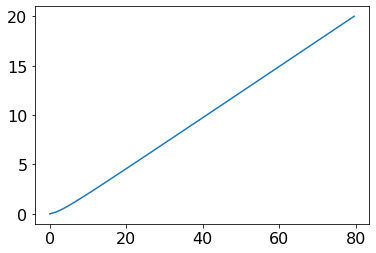

In [11]:
fig, ax = plt.subplots()

ax.plot(E_cin_proton_list, E_cin_per_nucleon_list)

In [12]:
max_Brho = 27
Brho_list = np.linspace(0,max_Brho, 1000)
E_cin_per_nucleon_list = []
E_cin_per_nucleon_list_t8 = []
for Brho in Brho_list:
    E_cin_per_nucleon = (E_0/A)*(np.sqrt((charge*Brho/E_0)**2+1)-1)
    E_cin_per_nucleon_list.append(E_cin_per_nucleon)

    E_cin_per_nucleon_t8 = (E_0/A)*(np.sqrt((82*Brho/E_0)**2+1)-1)
    E_cin_per_nucleon_list_t8.append(E_cin_per_nucleon_t8)

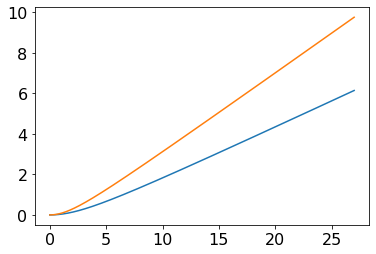

In [13]:
fig, ax = plt.subplots()

ax.plot(Brho_list, E_cin_per_nucleon_list)

ax.plot(Brho_list, E_cin_per_nucleon_list_t8)

# Center field in MU

In [14]:
# https://edms.cern.ch/ui/#!master/navigator/document?D:100345778:100345778:subDocs
MU_current = [
199.3,
268.2,
403.2,
543.2,
999.2,
1331.9,
1499.0,
1998.8,
2664.8,
2998.7,
3498.6,
3998.4,
4498.4,
4998.4,
5378.3,
5598.2,
5798.3,
5898.2,
5998.2,
6098.2,
6198.2,
6298.0,
6398.0,
6498.1,
]

field_T_D_side = [
0.05047,
0.06757,
0.10109,
0.13596,
0.25011,
0.33350,
0.37529,
0.50021,
0.66599,
0.74882,
0.87213,
0.99388,
1.11040,
1.20945,
1.27066,
1.30291,
1.33076,
1.34420,
1.35750,
1.37052,
1.38328,
1.39594,
1.40833,
1.42050,
]

field_T_F_side = [
0.05032,
0.06738,
0.10081,
0.13561,
0.24949,
0.33265,
0.37433,
0.49891,
0.66425,
0.74688,
0.86993,
0.99149,
1.10801,
1.20702,
1.26802,
1.30001,
1.32763,
1.34095,
1.35413,
1.36703,
1.37968,
1.39222,
1.40450,
1.41651,
]


Text(0, 0.5, 'B-field [T]')

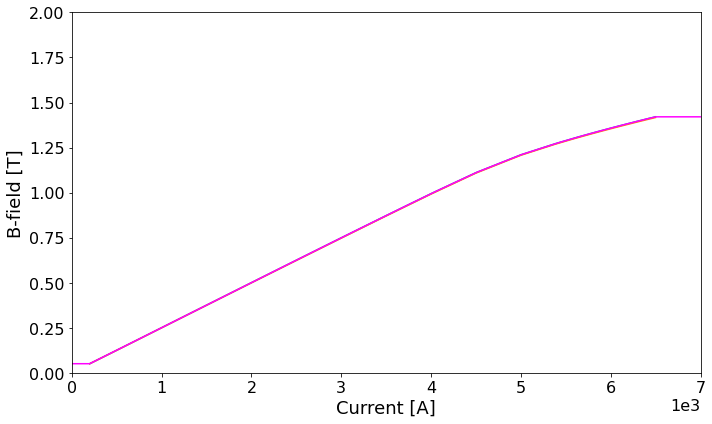

In [15]:
fig, ax = plt.subplots(tight_layout=True, figsize=(10,6))

ax.plot(MU_current, field_T_D_side)
ax.plot(MU_current, field_T_F_side)

field_list = []
current_list = np.linspace(0, 7000, 1000)
for current in current_list:
    field_list.append(np.interp(current, MU_current,field_T_D_side))

ax.plot(current_list, field_list, color="magenta")

ax.set_xlim(0,7000)
ax.set_ylim(0,2)
ax.set_xlabel("Current [A]")
ax.set_ylabel("B-field [T]")

# Second version

In [16]:
# Data to plot
max_Brho = 35
Brho_list = np.linspace(0,max_Brho, 1000)
E_cin_per_nucleon_list = []
E_cin_per_nucleon_list_t8 = []
for Brho in Brho_list:
    E_cin_per_nucleon = (E_0/A)*(np.sqrt((charge*Brho/E_0)**2+1)-1)
    E_cin_per_nucleon_list.append(E_cin_per_nucleon)

    E_cin_per_nucleon_t8 = (E_0/A)*(np.sqrt((82*Brho/E_0)**2+1)-1)
    E_cin_per_nucleon_list_t8.append(E_cin_per_nucleon_t8)
    
    
Special_Ecin_u = [0.5,1,2, 3]
Special_momentum_from_E_cin = []
Special_momentum_from_E_cin_irrad = []
for E_cin_per_nucleon in Special_Ecin_u:

    mass_defect_GeV = Z*m_proton_GeV + N*m_neutron_GeV + (Z-charge)*m_electron_GeV - A*m_u_GeV
    E_0 = Z*m_proton_GeV + N*m_neutron_GeV - mass_defect_GeV
    p = E_0*np.sqrt( (((E_cin_per_nucleon*A)/E_0)+1 )**2 - 1)
    rho = 70.0789 # m
    Brho = p/charge
    Special_momentum_from_E_cin.append(Brho)
    
    Brho = p/82
    Special_momentum_from_E_cin_irrad.append(Brho)

    
Special_Brho = [2.8, 20, 24, 26.5]
Special_E_cin_from_Brho = []
Special_E_cin_from_Brho_irrad = []
for Brho in Special_Brho:
    E_cin = E_0/208*(np.sqrt((charge*Brho/E_0)**2+1) -1)
    Special_E_cin_from_Brho.append(E_cin)
    E_cin_irrad = E_0/208*(np.sqrt((82*Brho/E_0)**2+1) -1)
    Special_E_cin_from_Brho_irrad.append(E_cin_irrad)
    
# Special_Ecin_u_irrad = [2,3]
# Special_Brho_from_E_cin_irrad = []
# for E_cin_per_nucleon in Special_Ecin_u_irrad:
#     p = E_0*np.sqrt( (((E_cin_per_nucleon*A)/E_0)+1 )**2 - 1)
#     Brho = p/82
#     Special_Brho_from_E_cin_irrad.append(Brho)

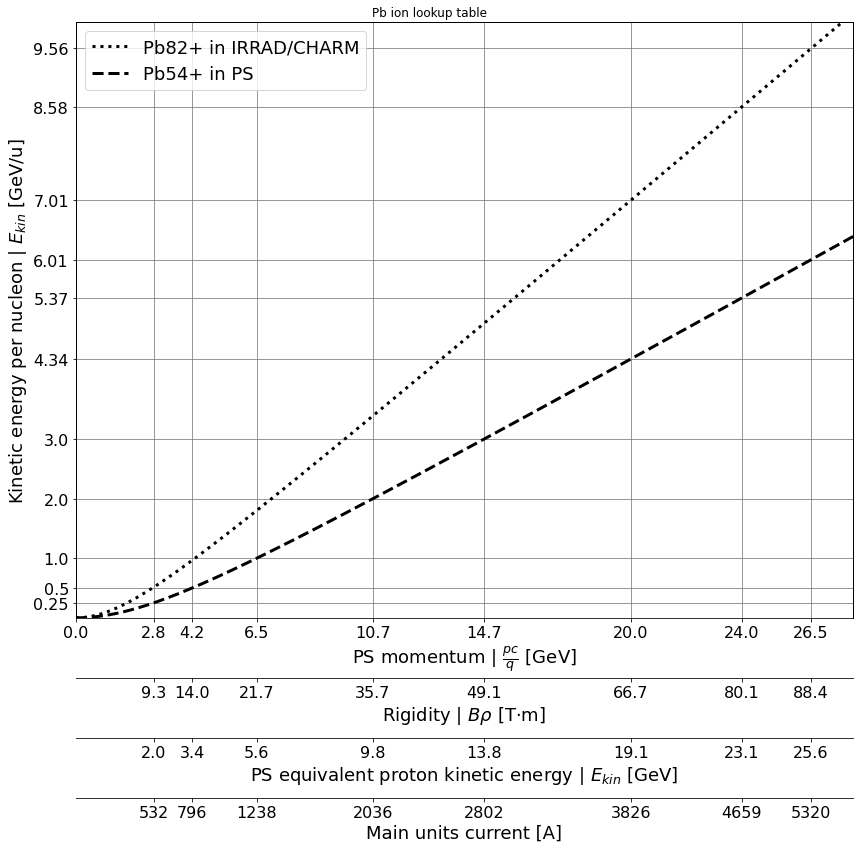

In [17]:
# Plot the data
fig, ax1 = plt.subplots(figsize=(12,12), tight_layout=True)

ax1.plot(Brho_list, E_cin_per_nucleon_list_t8, lw=3, color="black", ls="dotted", label="Pb82+ in IRRAD/CHARM")
ax1.plot(Brho_list,E_cin_per_nucleon_list, color="k", ls="--", lw=3, zorder=99, label="Pb54+ in PS")
ax1.set_xlabel(r"PS momentum | $\frac{pc}{q}$ [GeV]")
ax1.set_ylabel("Kinetic energy per nucleon | $E_{kin}$ [GeV/u]")


pc_axis = np.sort(np.concatenate([[0],Special_Brho, Special_momentum_from_E_cin])) # + Special_momentum_from_E_cin_irrad

ax1.set_xticks(pc_axis)
ax1.set_xticklabels(pc_axis)
labels = [item.get_text() for item in ax1.get_xticklabels()]
ax1.set_xticklabels([str(round(float(label), 1)) for label in labels])

pc_yaxis = np.sort(np.concatenate([[],Special_Ecin_u,Special_E_cin_from_Brho, Special_E_cin_from_Brho_irrad[1:]]))
ax1.set_yticks(pc_yaxis)
ax1.set_yticklabels(pc_yaxis)
labels = [item.get_text() for item in ax1.get_yticklabels()]
ax1.set_yticklabels([str(round(float(label), 2)) for label in labels])

ax1.set_xlim(0,28)
ax1.set_ylim(0,10)

# Set second x-axis Rigidity in Tm
ax2 = ax1.twiny()

ax2.set_xticks(pc_axis[1:])
ax2.set_xticklabels(pc_axis[1:]*3.3356)
# Reduce number of decimal points
labels = [item.get_text() for item in ax2.get_xticklabels()]
ax2.set_xticklabels([str(round(float(label), 1)) for label in labels])

ax2.xaxis.set_ticks_position('bottom')
ax2.xaxis.set_label_position('bottom')
ax2.spines['bottom'].set_position(('outward', 60))
ax2.set_xlabel(r'Rigidity | $B\rho$ [T$\cdot$m]')
ax2.set_xlim(ax1.get_xlim())

# Set third x-axis Proton equivalent kinetic energy
ax3 = ax1.twiny()

ax3.set_xticks(pc_axis[1:])
ax3.set_xticklabels(np.sqrt(pc_axis[1:]**2+m_proton_GeV**2)-m_proton_GeV)
# Reduce number of decimal points
labels = [item.get_text() for item in ax3.get_xticklabels()]
ax3.set_xticklabels([str(round(float(label), 1)) for label in labels])

ax3.xaxis.set_ticks_position('bottom')
ax3.xaxis.set_label_position('bottom')
ax3.spines['bottom'].set_position(('outward', 120))
ax3.set_xlabel(r'PS equivalent proton kinetic energy | $E_{kin}$ [GeV]')
ax3.set_xlim(ax1.get_xlim())

# Set fourth x-axis B-field
ax4 = ax1.twiny()

ax4.set_xticks(pc_axis[1:])
current = np.interp(pc_axis[1:]*3.3356/rho, field_T_D_side, MU_current)
ax4.set_xticklabels(current)

# Reduce number of decimal points
labels = [item.get_text() for item in ax4.get_xticklabels()]
ax4.set_xticklabels([str(int(float(label))) for label in labels])


ax4.xaxis.set_ticks_position('bottom')
ax4.xaxis.set_label_position('bottom')
ax4.spines['bottom'].set_position(('outward', 180))
ax4.set_xlabel(r'Main units current [A]')
ax4.set_xlim(ax1.get_xlim())

# for tick in ax4.xaxis.get_major_ticks():
#     tick.label.set_fontsize(14)
#     tick.label.set_rotation(45)

ax1.grid(color="gray", zorder=0)

ax1.legend(loc="upper left")


fig.suptitle("Pb ion lookup table ")

plt.savefig("fig/kinetic_energy_lookup_table_v2.png", dpi=300, format=None, metadata=None,
        bbox_inches="tight", transparent = False, facecolor = "white")

# Reverse axis

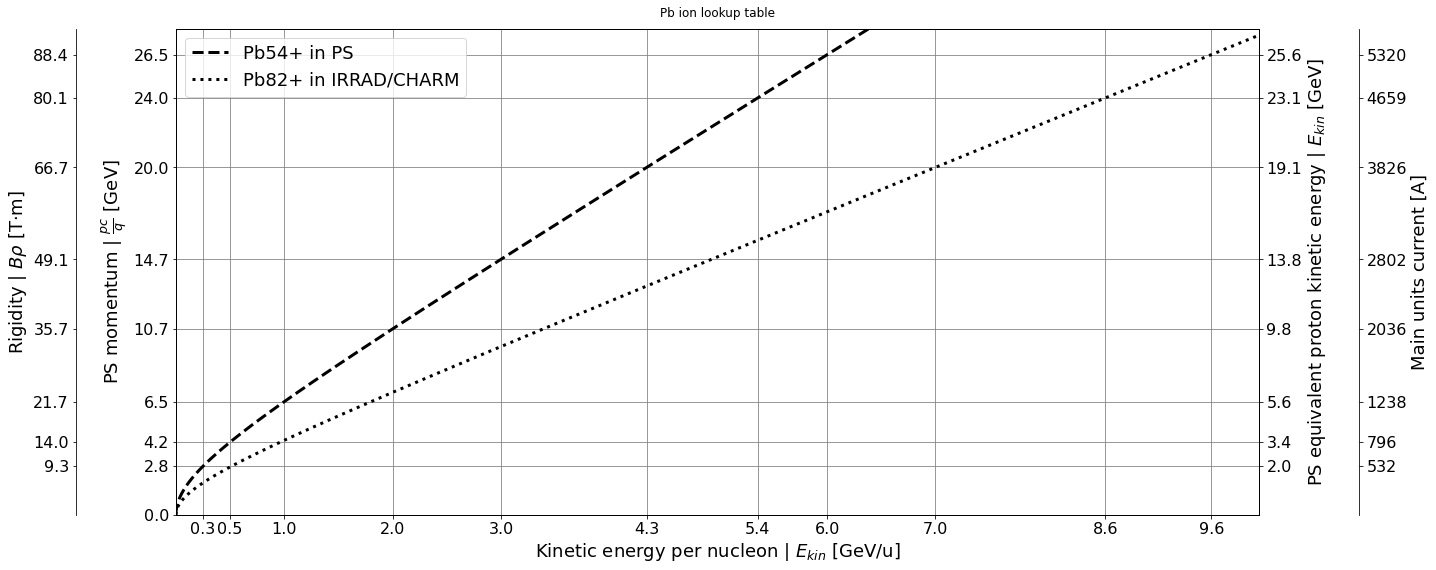

In [18]:
# Plot the data
fig, ax1 = plt.subplots(figsize=(20,8), tight_layout=True)

ax1.plot(E_cin_per_nucleon_list, Brho_list, color="k", ls="--", lw=3, zorder=99, label="Pb54+ in PS")
ax1.plot(E_cin_per_nucleon_list_t8, Brho_list, lw=3, color="black", ls="dotted", label="Pb82+ in IRRAD/CHARM")

ax1.set_ylabel(r"PS momentum | $\frac{pc}{q}$ [GeV]")
ax1.set_xlabel("Kinetic energy per nucleon | $E_{kin}$ [GeV/u]")


pc_axis = np.sort(np.concatenate([[0],Special_Brho, Special_momentum_from_E_cin])) # + Special_momentum_from_E_cin_irrad

ax1.set_yticks(pc_axis)
ax1.set_yticklabels(pc_axis)
labels = [item.get_text() for item in ax1.get_yticklabels()]
ax1.set_yticklabels([str(round(float(label), 1)) for label in labels])

pc_yaxis = np.sort(np.concatenate([[],Special_Ecin_u,Special_E_cin_from_Brho, Special_E_cin_from_Brho_irrad[1:]]))
ax1.set_xticks(pc_yaxis)
ax1.set_xticklabels(pc_yaxis)
labels = [item.get_text() for item in ax1.get_xticklabels()]
ax1.set_xticklabels([str(round(float(label), 1)) for label in labels])

ax1.set_ylim(0,28)
ax1.set_xlim(0,10)

# Set second y-axis Rigidity in Tm
ax2 = ax1.twinx()

ax2.set_yticks(pc_axis[1:])
ax2.set_yticklabels(pc_axis[1:]*3.3356)
# Reduce number of decimal points
labels = [item.get_text() for item in ax2.get_yticklabels()]
ax2.set_yticklabels([str(round(float(label), 1)) for label in labels])

ax2.yaxis.set_ticks_position('left')
ax2.yaxis.set_label_position('left')
ax2.spines['left'].set_position(('outward', 100))
ax2.set_ylabel(r'Rigidity | $B\rho$ [T$\cdot$m]')
ax2.set_ylim(ax1.get_ylim())

# Set third x-axis Proton equivalent kinetic energy
ax3 = ax1.twinx()

ax3.set_yticks(pc_axis[1:])
ax3.set_yticklabels(np.sqrt(pc_axis[1:]**2+m_proton_GeV**2)-m_proton_GeV)
# Reduce number of decimal points
labels = [item.get_text() for item in ax3.get_yticklabels()]
ax3.set_yticklabels([str(round(float(label), 1)) for label in labels])

ax3.yaxis.set_ticks_position('right')
ax3.yaxis.set_label_position('right')
ax3.spines['right'].set_position(('outward', 0))
ax3.set_ylabel(r'PS equivalent proton kinetic energy | $E_{kin}$ [GeV]')
ax3.set_ylim(ax1.get_ylim())

# Set fourth x-axis B-field
ax4 = ax1.twinx()

ax4.set_yticks(pc_axis[1:])
current = np.interp(pc_axis[1:]*3.3356/rho, field_T_D_side, MU_current)
ax4.set_yticklabels(current)

# Reduce number of decimal points
labels = [item.get_text() for item in ax4.get_yticklabels()]
ax4.set_yticklabels([str(int(float(label))) for label in labels])


ax4.yaxis.set_ticks_position('right')
ax4.yaxis.set_label_position('right')
ax4.spines['right'].set_position(('outward', 100))
ax4.set_ylabel(r'Main units current [A]')
ax4.set_ylim(ax1.get_ylim())

# for tick in ax4.xaxis.get_major_ticks():
#     tick.label.set_fontsize(14)
#     tick.label.set_rotation(45)

ax1.grid(color="gray", zorder=0)

ax1.legend(loc="upper left")


fig.suptitle("Pb ion lookup table ")

plt.savefig("fig/kinetic_energy_lookup_table_v3.png", dpi=300, format=None, metadata=None,
        bbox_inches="tight", transparent = False, facecolor = "white")

# Zoom on lower energy

In [19]:
# Data to plot
max_Brho = 35
Brho_list = np.linspace(0,max_Brho, 1000)
E_cin_per_nucleon_list = []
E_cin_per_nucleon_list_t8 = []
for Brho in Brho_list:
    E_cin_per_nucleon = (E_0/A)*(np.sqrt((charge*Brho/E_0)**2+1)-1)
    E_cin_per_nucleon_list.append(E_cin_per_nucleon)

    E_cin_per_nucleon_t8 = (E_0/A)*(np.sqrt((82*Brho/E_0)**2+1)-1)
    E_cin_per_nucleon_list_t8.append(E_cin_per_nucleon_t8)
    
    
Special_Ecin_u = [0.072, 0.4, 0.75, 1,2, 3]
Special_momentum_from_E_cin = []
Special_momentum_from_E_cin_irrad = []
for E_cin_per_nucleon in Special_Ecin_u:

    mass_defect_GeV = Z*m_proton_GeV + N*m_neutron_GeV + (Z-charge)*m_electron_GeV - A*m_u_GeV
    E_0 = Z*m_proton_GeV + N*m_neutron_GeV - mass_defect_GeV
    p = E_0*np.sqrt( (((E_cin_per_nucleon*A)/E_0)+1 )**2 - 1)
    rho = 70.0789 # m
    Brho = p/charge
    Special_momentum_from_E_cin.append(Brho)
    
    Brho = p/82
    Special_momentum_from_E_cin_irrad.append(Brho)

    
Special_Brho = [2.8, 20, 24, 26.5]
Special_E_cin_from_Brho = []
Special_E_cin_from_Brho_irrad = []
for Brho in Special_Brho:
    E_cin = E_0/208*(np.sqrt((charge*Brho/E_0)**2+1) -1)
    Special_E_cin_from_Brho.append(E_cin)
    E_cin_irrad = E_0/208*(np.sqrt((82*Brho/E_0)**2+1) -1)
    Special_E_cin_from_Brho_irrad.append(E_cin_irrad)
    
# Special_Ecin_u_irrad = [2,3]
# Special_Brho_from_E_cin_irrad = []
# for E_cin_per_nucleon in Special_Ecin_u_irrad:
#     p = E_0*np.sqrt( (((E_cin_per_nucleon*A)/E_0)+1 )**2 - 1)
#     Brho = p/82
#     Special_Brho_from_E_cin_irrad.append(Brho)

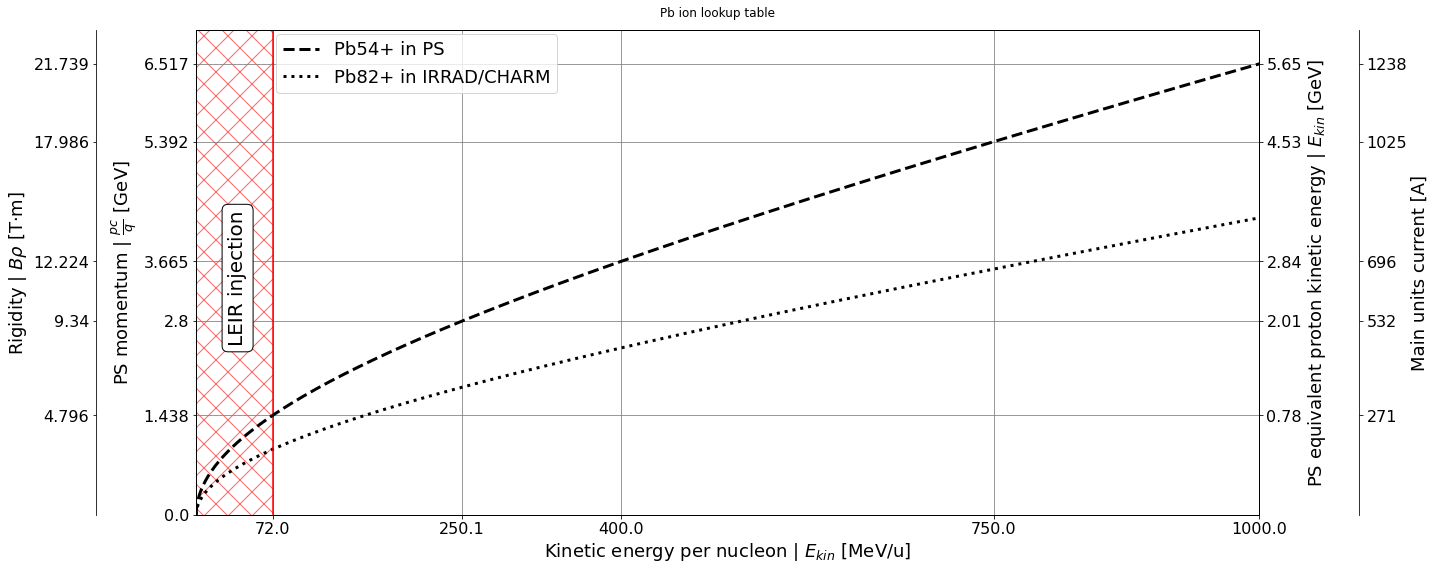

In [20]:
# Plot the data
fig, ax1 = plt.subplots(figsize=(20,8), tight_layout=True)

ax1.plot(E_cin_per_nucleon_list, Brho_list, color="k", ls="--", lw=3, zorder=99, label="Pb54+ in PS")
ax1.plot(E_cin_per_nucleon_list_t8, Brho_list, lw=3, color="black", ls="dotted", label="Pb82+ in IRRAD/CHARM")

ax1.set_ylabel(r"PS momentum | $\frac{pc}{q}$ [GeV]")
ax1.set_xlabel("Kinetic energy per nucleon | $E_{kin}$ [MeV/u]")

# Add information on LEIR injection energy
ax1.axvline(0.072, color="r")
LEIR_region = Rectangle((0,0), 0.072, 10, color="r", fill=False, alpha=0.6, hatch="x", zorder=0)
ax1.add_patch(LEIR_region)
ax1.text(x=0.03, y=2.5, s="LEIR injection", rotation=90, fontsize=20, bbox=dict(facecolor='w', alpha=1., boxstyle="round"))

pc_axis = np.sort(np.concatenate([[0],Special_Brho, Special_momentum_from_E_cin])) # + Special_momentum_from_E_cin_irrad

ax1.set_yticks(pc_axis)
ax1.set_yticklabels(pc_axis)
labels = [item.get_text() for item in ax1.get_yticklabels()]
ax1.set_yticklabels([str(round(float(label), 3)) for label in labels])

pc_yaxis = np.sort(np.concatenate([[],Special_Ecin_u,Special_E_cin_from_Brho, Special_E_cin_from_Brho_irrad[1:]]))
ax1.set_xticks(pc_yaxis)
ax1.set_xticklabels(pc_yaxis*1000)
labels = [item.get_text() for item in ax1.get_xticklabels()]
ax1.set_xticklabels([str(round(float(label), 1)) for label in labels])

ax1.set_ylim(0,7)
ax1.set_xlim(0,1)

# Set second y-axis Rigidity in Tm
ax2 = ax1.twinx()

ax2.set_yticks(pc_axis[1:])
ax2.set_yticklabels(pc_axis[1:]*3.3356)
# Reduce number of decimal points
labels = [item.get_text() for item in ax2.get_yticklabels()]
ax2.set_yticklabels([str(round(float(label), 3)) for label in labels])

ax2.yaxis.set_ticks_position('left')
ax2.yaxis.set_label_position('left')
ax2.spines['left'].set_position(('outward', 100))
ax2.set_ylabel(r'Rigidity | $B\rho$ [T$\cdot$m]')
ax2.set_ylim(ax1.get_ylim())

# Set third x-axis Proton equivalent kinetic energy
ax3 = ax1.twinx()

ax3.set_yticks(pc_axis[1:])
ax3.set_yticklabels(np.sqrt(pc_axis[1:]**2+m_proton_GeV**2)-m_proton_GeV)
# Reduce number of decimal points
labels = [item.get_text() for item in ax3.get_yticklabels()]
ax3.set_yticklabels([str(round(float(label), 2)) for label in labels])

ax3.yaxis.set_ticks_position('right')
ax3.yaxis.set_label_position('right')
ax3.spines['right'].set_position(('outward', 0))
ax3.set_ylabel(r'PS equivalent proton kinetic energy | $E_{kin}$ [GeV]')
ax3.set_ylim(ax1.get_ylim())

# Set fourth x-axis B-field
ax4 = ax1.twinx()

ax4.set_yticks(pc_axis[1:])
current = np.interp(pc_axis[1:]*3.3356/rho, field_T_D_side, MU_current)
ax4.set_yticklabels(current)

# Reduce number of decimal points
labels = [item.get_text() for item in ax4.get_yticklabels()]
ax4.set_yticklabels([str(int(float(label))) for label in labels])


ax4.yaxis.set_ticks_position('right')
ax4.yaxis.set_label_position('right')
ax4.spines['right'].set_position(('outward', 100))
ax4.set_ylabel(r'Main units current [A]')
ax4.set_ylim(ax1.get_ylim())

# for tick in ax4.xaxis.get_major_ticks():
#     tick.label.set_fontsize(14)
#     tick.label.set_rotation(45)

ax1.grid(color="gray", zorder=0)

ax1.legend(loc=(0.075, 0.87))



fig.suptitle("Pb ion lookup table ")

plt.savefig("fig/kinetic_energy_lookup_table_zoom.png", dpi=300, format=None, metadata=None,
        bbox_inches="tight", transparent = False, facecolor = "white")

# With B-field

In [21]:
# Data to plot
max_Brho = 35
Brho_list = np.linspace(0,max_Brho, 1000)
E_cin_per_nucleon_list = []
E_cin_per_nucleon_list_t8 = []
for Brho in Brho_list:
    E_cin_per_nucleon = (E_0/A)*(np.sqrt((charge*Brho/E_0)**2+1)-1)
    E_cin_per_nucleon_list.append(E_cin_per_nucleon)

    E_cin_per_nucleon_t8 = (E_0/A)*(np.sqrt((82*Brho/E_0)**2+1)-1)
    E_cin_per_nucleon_list_t8.append(E_cin_per_nucleon_t8)

Special_Ecin_u = [0.072, 0.65, 0.75, 1]
Special_momentum_from_E_cin = []
Special_momentum_from_E_cin_irrad = []
for E_cin_per_nucleon in Special_Ecin_u:

    mass_defect_GeV = Z*m_proton_GeV + N*m_neutron_GeV + (Z-charge)*m_electron_GeV - A*m_u_GeV
    E_0 = Z*m_proton_GeV + N*m_neutron_GeV - mass_defect_GeV
    p = E_0*np.sqrt( (((E_cin_per_nucleon*A)/E_0)+1 )**2 - 1)
    rho = 70.0789 # m
    Brho = p/charge
    Special_momentum_from_E_cin.append(Brho)
    
    Brho = p/82
    Special_momentum_from_E_cin_irrad.append(Brho)


Special_B_in_gauss = np.array([1900])/10000*rho/3.3356
Special_Brho = [20, 24, 26.5]
Special_Brho = np.concatenate([Special_Brho,
#                                Special_B_in_gauss,
                              ])
Special_E_cin_from_Brho = []
Special_E_cin_from_Brho_irrad = []
for Brho in Special_Brho:
    E_cin = E_0/208*(np.sqrt((charge*Brho/E_0)**2+1) -1)
    Special_E_cin_from_Brho.append(E_cin)
#     E_cin_irrad = E_0/208*(np.sqrt((82*Brho/E_0)**2+1) -1)
#     Special_E_cin_from_Brho_irrad.append(E_cin_irrad)
    
Special_Ecin_u_irrad = [1]
Special_Brho_from_E_cin_irrad = []
for E_cin_per_nucleon in Special_Ecin_u_irrad:
    p = E_0*np.sqrt( (((E_cin_per_nucleon*A)/E_0)+1 )**2 - 1)
    Brho = p/82
    Special_Brho_from_E_cin_irrad.append(Brho)

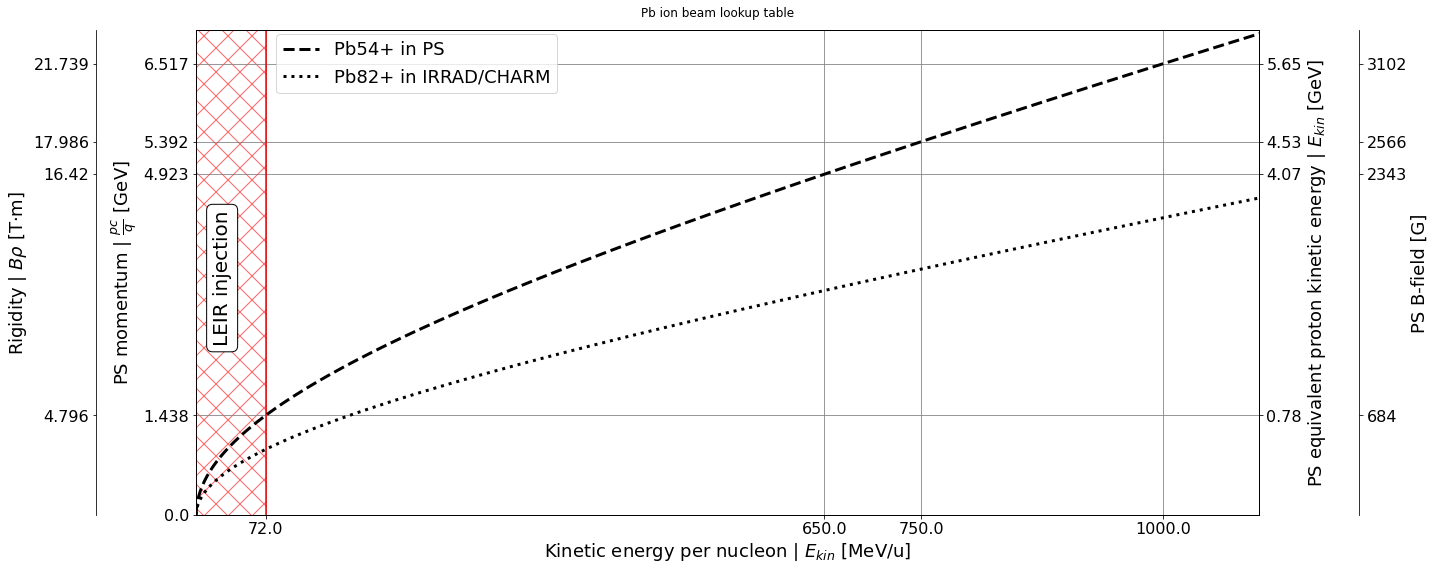

In [22]:
# Plot the data
fig, ax1 = plt.subplots(figsize=(20,8), tight_layout=True)

ax1.plot(E_cin_per_nucleon_list, Brho_list, color="k", ls="--", lw=3, zorder=99, label="Pb54+ in PS")
ax1.plot(E_cin_per_nucleon_list_t8, Brho_list, lw=3, color="black", ls="dotted", label="Pb82+ in IRRAD/CHARM")

ax1.set_ylabel(r"PS momentum | $\frac{pc}{q}$ [GeV]")
ax1.set_xlabel("Kinetic energy per nucleon | $E_{kin}$ [MeV/u]")

# Add information on LEIR injection energy
ax1.axvline(0.072, color="r")
LEIR_region = Rectangle((0,0), 0.072, 20, color="r", fill=False, alpha=0.6, hatch="x", zorder=0)
ax1.add_patch(LEIR_region)
ax1.text(x=0.017, y=2.5, s="LEIR injection", rotation=90, fontsize=20, bbox=dict(facecolor='w', alpha=1., boxstyle="round"))

pc_axis = np.sort(np.concatenate([[0],Special_Brho, Special_momentum_from_E_cin])) # + Special_momentum_from_E_cin_irrad

ax1.set_yticks(pc_axis)
ax1.set_yticklabels(pc_axis)
labels = [item.get_text() for item in ax1.get_yticklabels()]
ax1.set_yticklabels([str(round(float(label), 3)) for label in labels])

pc_yaxis = np.sort(np.concatenate([[],Special_Ecin_u,Special_E_cin_from_Brho, Special_E_cin_from_Brho_irrad[1:]]))
ax1.set_xticks(pc_yaxis)
ax1.set_xticklabels(pc_yaxis*1000)
labels = [item.get_text() for item in ax1.get_xticklabels()]
ax1.set_xticklabels([str(round(float(label), 1)) for label in labels])

ax1.set_ylim(0,7)
ax1.set_xlim(0,1.1)

# Set second y-axis Rigidity in Tm
ax2 = ax1.twinx()

ax2.set_yticks(pc_axis[1:])
ax2.set_yticklabels(pc_axis[1:]*3.3356)
# Reduce number of decimal points
labels = [item.get_text() for item in ax2.get_yticklabels()]
ax2.set_yticklabels([str(round(float(label), 3)) for label in labels])

ax2.yaxis.set_ticks_position('left')
ax2.yaxis.set_label_position('left')
ax2.spines['left'].set_position(('outward', 100))
ax2.set_ylabel(r'Rigidity | $B\rho$ [T$\cdot$m]')
ax2.set_ylim(ax1.get_ylim())

# Set third x-axis Proton equivalent kinetic energy
ax3 = ax1.twinx()
ax3.set_yticks(pc_axis[1:])
ax3.set_yticklabels(np.sqrt(pc_axis[1:]**2+m_proton_GeV**2)-m_proton_GeV)
# Reduce number of decimal points
labels = [item.get_text() for item in ax3.get_yticklabels()]
ax3.set_yticklabels([str(round(float(label), 2)) for label in labels])

ax3.yaxis.set_ticks_position('right')
ax3.yaxis.set_label_position('right')
ax3.spines['right'].set_position(('outward', 0))
ax3.set_ylabel(r'PS equivalent proton kinetic energy | $E_{kin}$ [GeV]')
ax3.set_ylim(ax1.get_ylim())

# Set fourth x-axis B-field
ax4 = ax1.twinx()
ax4.set_yticks(pc_axis[1:])
B_field = pc_axis[1:]*3.3356/rho*10000
ax4.set_yticklabels(B_field)

# Reduce number of decimal points
labels = [item.get_text() for item in ax4.get_yticklabels()]
ax4.set_yticklabels([str(int(float(label))) for label in labels])


ax4.yaxis.set_ticks_position('right')
ax4.yaxis.set_label_position('right')
ax4.spines['right'].set_position(('outward', 100))
ax4.set_ylabel(r'PS B-field [G]')
ax4.set_ylim(ax1.get_ylim())

# for tick in ax4.xaxis.get_major_ticks():
#     tick.label.set_fontsize(14)
#     tick.label.set_rotation(45)

ax1.grid(color="gray", zorder=0)
ax1.legend(loc=(0.075, 0.87))

fig.suptitle("Pb ion beam lookup table ")

plt.savefig("fig/kinetic_energy_lookup_table_zoom_B_field.png", dpi=300, format=None, metadata=None,
            bbox_inches="tight", transparent = False, facecolor = "white")

In [23]:
E_cin_l = [72, 650, 750, 1000]
partially_stripped_momentum_list = []
fully_stripped_momentum_list = []
PS_B_field_list = []
user_list = ["", "CPS.USER.MD4", "CPS.USER.EAST3", "CPS.USER.EAST4"]

for E_cin in E_cin_l:
    
    E_cin_per_nucleon = E_cin/1000 # GeV/u

    # Ion properties
    A = 208.0 # protons + neutrons
    Z = 82.0 # protons
    N = 126.0 # neutrons
    charge = 54.0
    m_proton_GeV = 0.93828 # GeV
    m_neutron_GeV = 0.93957 # GeV
    m_electron_GeV = 0.000511 # GeV
    m_u_GeV = 0.9315 # GeV
    mass_defect_GeV = Z*m_proton_GeV + N*m_neutron_GeV + (Z-charge)*m_electron_GeV - A*m_u_GeV
    E_0 = Z*m_proton_GeV + N*m_neutron_GeV - mass_defect_GeV
    p = E_0*np.sqrt( (((E_cin_per_nucleon*A)/E_0)+1 )**2 - 1)
    rho = 70.0789 # m

    partially_stripped_momentum = round(p/charge,3)
    partially_stripped_momentum_list.append(partially_stripped_momentum)

    fully_stripped_momentum = round(p/82,3)
    fully_stripped_momentum_list.append(fully_stripped_momentum)

    B = int(3.3356*p/(rho*charge)*10000)
    PS_B_field_list.append(B)

In [24]:
d = {'E_cin': E_cin_l, 'partially_stripped_momentum': partially_stripped_momentum_list, 'fully_stripped_momentum': fully_stripped_momentum_list, 'PS_B_field': PS_B_field_list, "user": user_list}
df = pd.DataFrame(data=d)
df.sort_values(by=["E_cin"], ascending=False, inplace=True)
df.reset_index(drop=True, inplace=True)
df

E_cin  partially_stripped_momentum  fully_stripped_momentum  PS_B_field  \
0   1000                        6.517                    4.292        3102   
1    750                        5.392                    3.551        2566   
2    650                        4.923                    3.242        2343   
3     72                        1.438                    0.947         684   

             user  
0  CPS.USER.EAST4  
1  CPS.USER.EAST3  
2    CPS.USER.MD4  
3

# Gauss to Ekin

In [25]:
B = 3102
Ekin = (193.737692/208)*(np.sqrt(((1/((3.3356/(70.0789*54)*10000)/B))/193.737692)**2+1)-1)
print(Ekin)

0.999949796935401


In [26]:
import pickle
with open('Ekin_chimera_nov_2022.pickle', 'rb') as f:
    Ekin_chimera_nov_2022 = pickle.load(f)
Ekin_chimera_nov_2022 = np.sort(Ekin_chimera_nov_2022)

In [27]:
partially_stripped_momentum_list = []
fully_stripped_momentum_list = []
PS_B_field_list = []
user_list = ["", "CPS.USER.MD4", "CPS.USER.EAST3", "CPS.USER.EAST4"]

for E_cin in Ekin_chimera_nov_2022:
    
    E_cin_per_nucleon = E_cin # GeV/u

    # Ion properties
    A = 208.0 # protons + neutrons
    Z = 82.0 # protons
    N = 126.0 # neutrons
    charge = 54.0
    m_proton_GeV = 0.93828 # GeV
    m_neutron_GeV = 0.93957 # GeV
    m_electron_GeV = 0.000511 # GeV
    m_u_GeV = 0.9315 # GeV
    mass_defect_GeV = Z*m_proton_GeV + N*m_neutron_GeV + (Z-charge)*m_electron_GeV - A*m_u_GeV
    E_0 = Z*m_proton_GeV + N*m_neutron_GeV - mass_defect_GeV
    p = E_0*np.sqrt( (((E_cin_per_nucleon*A)/E_0)+1 )**2 - 1)
    rho = 70.0789 # m

    partially_stripped_momentum = round(p/charge,3)
    partially_stripped_momentum_list.append(partially_stripped_momentum)

    fully_stripped_momentum = round(p/82,3)
    fully_stripped_momentum_list.append(fully_stripped_momentum)

    B = int(3.3356*p/(rho*charge)*10000)
    PS_B_field_list.append(B)

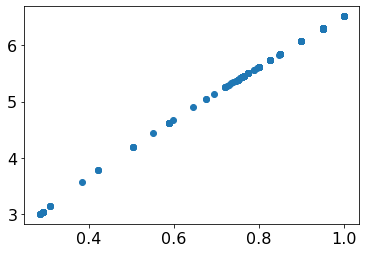

In [28]:
fig, ax = plt.subplots()
ax.scatter(Ekin_chimera_nov_2022, partially_stripped_momentum_list)

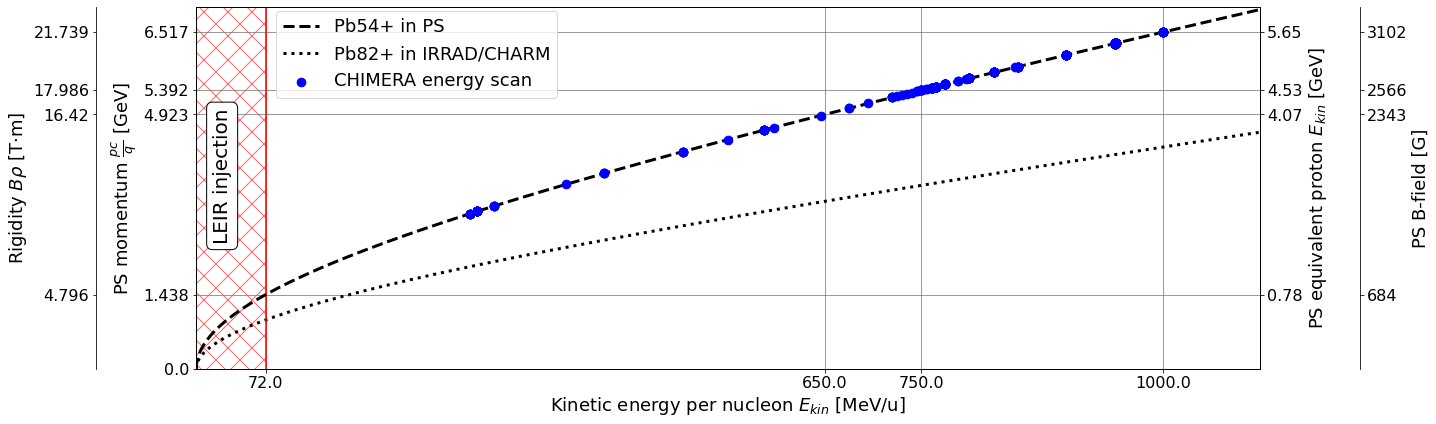

In [42]:
# Plot the data
fig, ax1 = plt.subplots(figsize=(20,6), tight_layout=True)

ax1.plot(E_cin_per_nucleon_list, Brho_list, color="k", ls="--", lw=3, zorder=90, label="Pb54+ in PS")
ax1.plot(E_cin_per_nucleon_list_t8, Brho_list, lw=3, color="black", ls="dotted", label="Pb82+ in IRRAD/CHARM")

ax1.set_ylabel(r"PS momentum $\frac{pc}{q}$ [GeV]")
ax1.set_xlabel("Kinetic energy per nucleon $E_{kin}$ [MeV/u]")

# Add information on LEIR injection energy
ax1.axvline(0.072, color="r")
LEIR_region = Rectangle((0,0), 0.072, 20, color="r", fill=False, alpha=0.6, hatch="x", zorder=0)
ax1.add_patch(LEIR_region)
ax1.text(x=0.017, y=2.5, s="LEIR injection", rotation=90, fontsize=20, bbox=dict(facecolor='w', alpha=1., boxstyle="round"))

pc_axis = np.sort(np.concatenate([[0],Special_Brho, Special_momentum_from_E_cin])) # + Special_momentum_from_E_cin_irrad

ax1.set_yticks(pc_axis)
ax1.set_yticklabels(pc_axis)
labels = [item.get_text() for item in ax1.get_yticklabels()]
ax1.set_yticklabels([str(round(float(label), 3)) for label in labels])


pc_yaxis = np.sort(np.concatenate([[],Special_Ecin_u,Special_E_cin_from_Brho, Special_E_cin_from_Brho_irrad[1:]]))
ax1.set_xticks(pc_yaxis)
ax1.set_xticklabels(pc_yaxis*1000)
labels = [item.get_text() for item in ax1.get_xticklabels()]
ax1.set_xticklabels([str(round(float(label), 1)) for label in labels])

ax1.set_ylim(0,7)
ax1.set_xlim(0,1.1)


#CHIMERA
ax1.scatter(Ekin_chimera_nov_2022, partially_stripped_momentum_list, s=75, c="b", zorder=99, label="CHIMERA energy scan")

# Set second y-axis Rigidity in Tm
ax2 = ax1.twinx()

ax2.set_yticks(pc_axis[1:])
ax2.set_yticklabels(pc_axis[1:]*3.3356)
# Reduce number of decimal points
labels = [item.get_text() for item in ax2.get_yticklabels()]
ax2.set_yticklabels([str(round(float(label), 3)) for label in labels])

ax2.yaxis.set_ticks_position('left')
ax2.yaxis.set_label_position('left')
ax2.spines['left'].set_position(('outward', 100))
ax2.set_ylabel(r'Rigidity $B\rho$ [T$\cdot$m]')
ax2.set_ylim(ax1.get_ylim())

# Set third x-axis Proton equivalent kinetic energy
ax3 = ax1.twinx()
ax3.set_yticks(pc_axis[1:])
ax3.set_yticklabels(np.sqrt(pc_axis[1:]**2+m_proton_GeV**2)-m_proton_GeV)
# Reduce number of decimal points
labels = [item.get_text() for item in ax3.get_yticklabels()]
ax3.set_yticklabels([str(round(float(label), 2)) for label in labels])

ax3.yaxis.set_ticks_position('right')
ax3.yaxis.set_label_position('right')
ax3.spines['right'].set_position(('outward', 0))
ax3.set_ylabel(r'PS equivalent proton $E_{kin}$ [GeV]')
ax3.set_ylim(ax1.get_ylim())

# Set fourth x-axis B-field
ax4 = ax1.twinx()
ax4.set_yticks(pc_axis[1:])
B_field = pc_axis[1:]*3.3356/rho*10000
ax4.set_yticklabels(B_field)

# Reduce number of decimal points
labels = [item.get_text() for item in ax4.get_yticklabels()]
ax4.set_yticklabels([str(int(float(label))) for label in labels])


ax4.yaxis.set_ticks_position('right')
ax4.yaxis.set_label_position('right')
ax4.spines['right'].set_position(('outward', 100))
ax4.set_ylabel(r'PS B-field [G]')
ax4.set_ylim(ax1.get_ylim())

# for tick in ax4.xaxis.get_major_ticks():
#     tick.label.set_fontsize(14)
#     tick.label.set_rotation(45)

ax1.grid(color="gray", zorder=0)
ax1.legend(loc=(0.075, 0.75))

# fig.suptitle("Pb ion beam lookup table ")

plt.savefig("fig/kinetic_energy_lookup_chimera.png", dpi=300, format=None, metadata=None,
            bbox_inches="tight", transparent = False, facecolor = "white")